
<p><center style="color:#ff00ff; font-family:Arial; font-size:30px;">Thanks for visiting my notebook👀 
    </center></p>

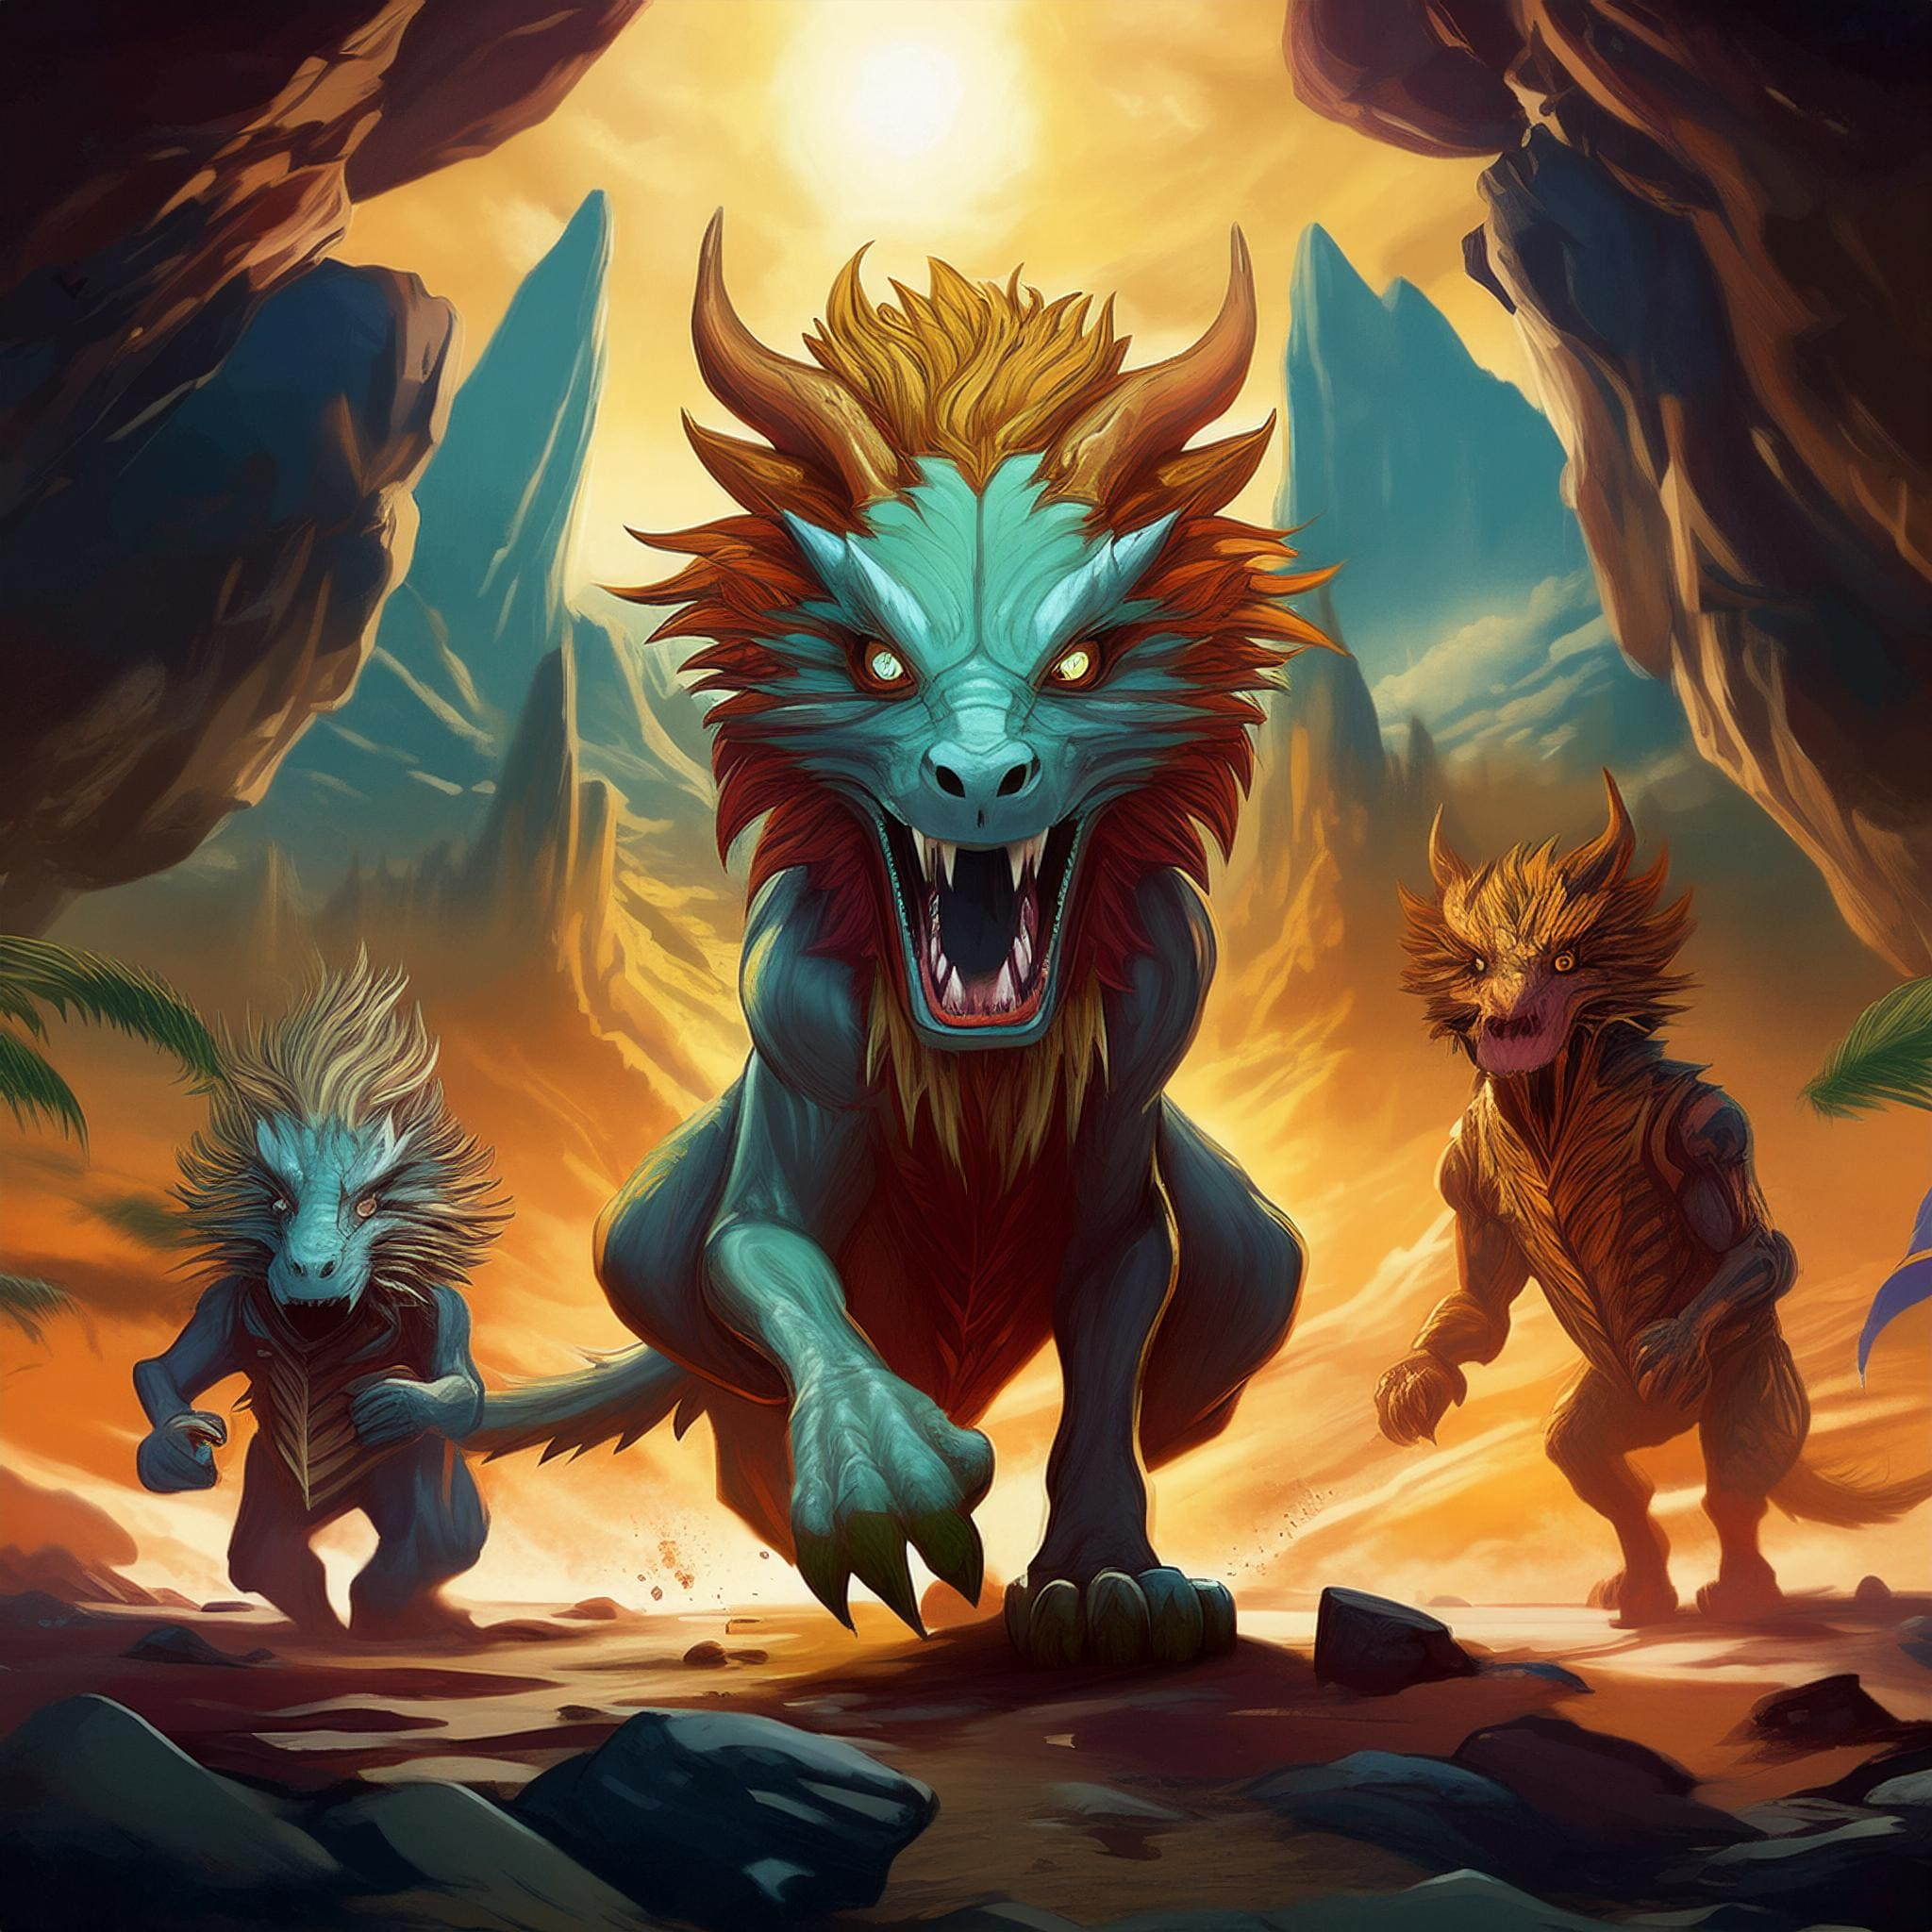

<p><center style="color:#000000; font-family:Arial; font-size:20px;">Do you like Pokémon??? 
    I've been watching the anime and playing the games since I was a kid. I found a dataset, so I created an EDA to take a look at it. There are many Pokémon I'm not familiar with, but this time I'm comparing the strength of Pokémon in their Dynamax state.  Please take a look if you're interested! 
    </center></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/GpBP9G5R/Firefly-87932.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Data</p>

In [2]:
df = pd.read_csv('/kaggle/input/pokmon-dataset-for-analysis/pokemon.csv')
df

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,GRASS\nPOISON,318,45,49,49,65,65,45
1,2,Ivysaur,GRASS\nPOISON,405,60,62,63,80,80,60
2,3,Venusaur,GRASS\nPOISON,525,80,82,83,100,100,80
3,3,Venusaur\nMega Venusaur,GRASS\nPOISON,625,80,100,123,122,120,80
4,4,Charmander,FIRE,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1190,1006,Iron Valiant,FAIRY\nFIGHTING,590,74,130,90,120,60,116
1191,1007,Koraidon,FIGHTING\nDRAGON,670,100,135,115,85,100,135
1192,1008,Miraidon,ELECTRIC\nDRAGON,670,100,85,100,135,115,135
1193,1009,Walking Wake,WATER\nDRAGON,590,99,83,91,125,83,109


In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000,1195.000000
mean,493.087866,441.302092,70.918828,80.939749,74.625105,72.933054,72.117992,69.767364
std,293.833947,121.009420,26.878116,32.114270,30.693902,32.738068,27.617608,30.192561
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,235.500000,330.000000,52.000000,56.000000,51.500000,50.000000,50.000000,45.000000
50%,487.000000,461.000000,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,742.500000,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.500000
max,1010.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        1195 non-null   int64 
 1   Name     1195 non-null   object
 2   Type     1195 non-null   object
 3   Total    1195 non-null   int64 
 4   HP       1195 non-null   int64 
 5   Attack   1195 non-null   int64 
 6   Defense  1195 non-null   int64 
 7   Sp. Atk  1195 non-null   int64 
 8   Sp. Def  1195 non-null   int64 
 9   Speed    1195 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 93.5+ KB


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/GpBP9G5R/Firefly-87932.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Distribution of Types 　</p>

In [5]:
type_counts = df['Type'].value_counts()
total = type_counts.sum()
type_percentages = (type_counts / total) * 100

threshold = 1
small_categories = type_percentages[type_percentages <= threshold].index
df['Type'] = df['Type'].replace(small_categories, 'Other')
final_counts = df['Type'].value_counts()

fig = go.Figure(data=[go.Pie(labels=final_counts.index, values=final_counts.values, hole=.3)])

fig.update_layout(
    title_text="Distribution of Types with Other",
    annotations=[dict(text='Type', x=0.5, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/GpBP9G5R/Firefly-87932.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Dynamax is the strongest 　</p>

In [6]:
df_sorted = df.sort_values(by='Total', ascending=False)
df_sorted.head(5)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1058,890,Eternatus\nEternamax,Other,1125,255,115,250,125,250,130
201,150,Mewtwo\nMega Mewtwo X,Other,780,106,190,100,154,100,130
202,150,Mewtwo\nMega Mewtwo Y,PSYCHIC,780,106,150,70,194,120,140
475,384,Rayquaza\nMega Rayquaza,Other,780,105,180,100,180,100,115
473,383,Groudon\nPrimal Groudon,Other,770,100,180,160,150,90,90


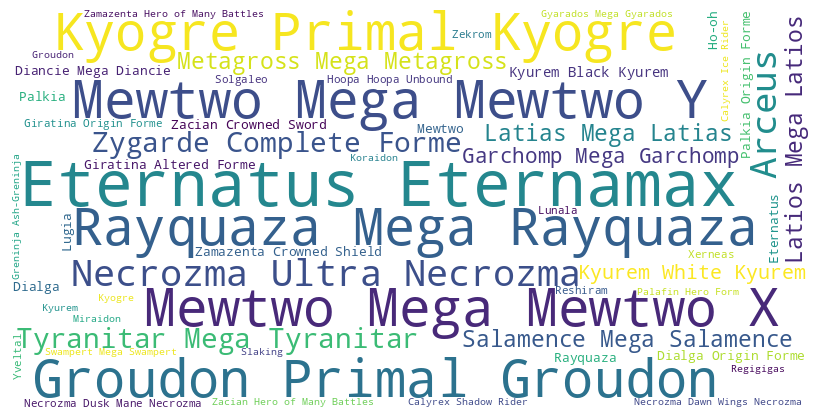

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure no newline characters in names
df['Name'] = df['Name'].str.replace('\n', ' ')

# Create a dictionary with the Pokémon name as the key and Total as the value
word_freq = {row['Name']: row['Total'] for _, row in df.iterrows()}

# Generate the word cloud
wordcloud = WordCloud(width=800, height= 400,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/GpBP9G5R/Firefly-87932.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Status vs Total</p>

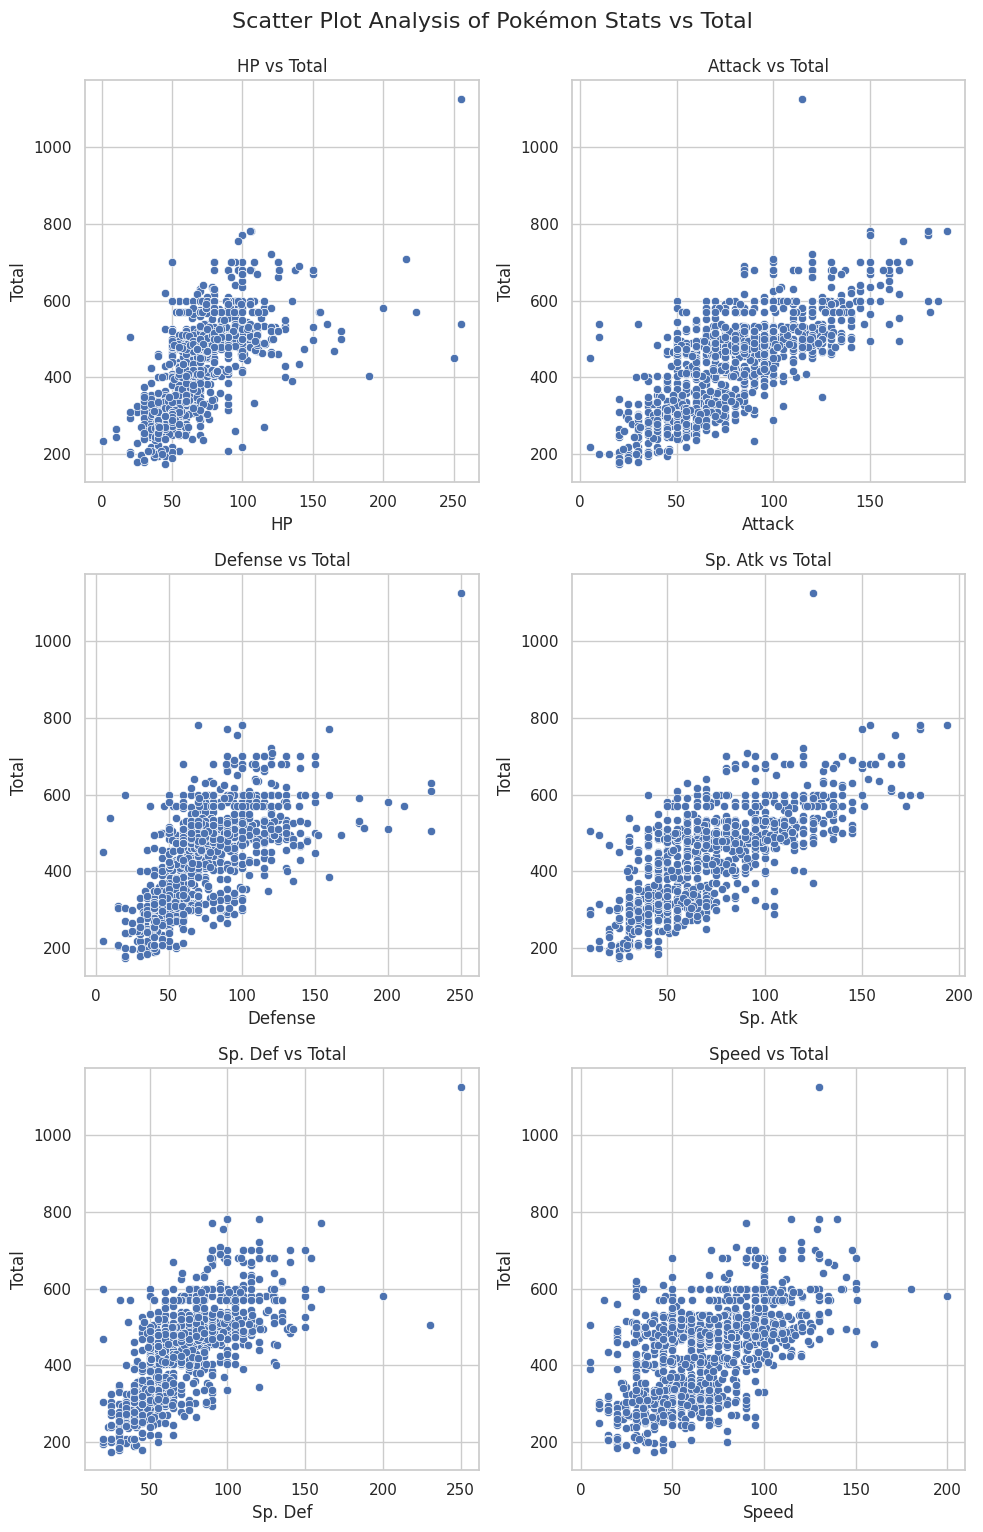

In [8]:
# Setting up the plot style
sns.set(style="whitegrid")

# Adjusting the pairplot to display the scatter plots in a 2x3 grid (2 columns and 3 rows)
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Flattening the 2D array of axes for easier iteration
axs = axs.flatten()

# Creating scatter plots for each stat against Total
stat_columns = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
for i, stat in enumerate(stat_columns):
    sns.scatterplot(x=df[stat], y=df["Total"], ax=axs[i])
    axs[i].set_title(f"{stat} vs Total")
    axs[i].set_xlabel(stat)
    axs[i].set_ylabel("Total")

# Adjusting layout to prevent overlap
plt.tight_layout()

# Adding a main title
fig.suptitle("Scatter Plot Analysis of Pokémon Stats vs Total", y=1.02, fontsize=16)

# Displaying the plot
plt.show()

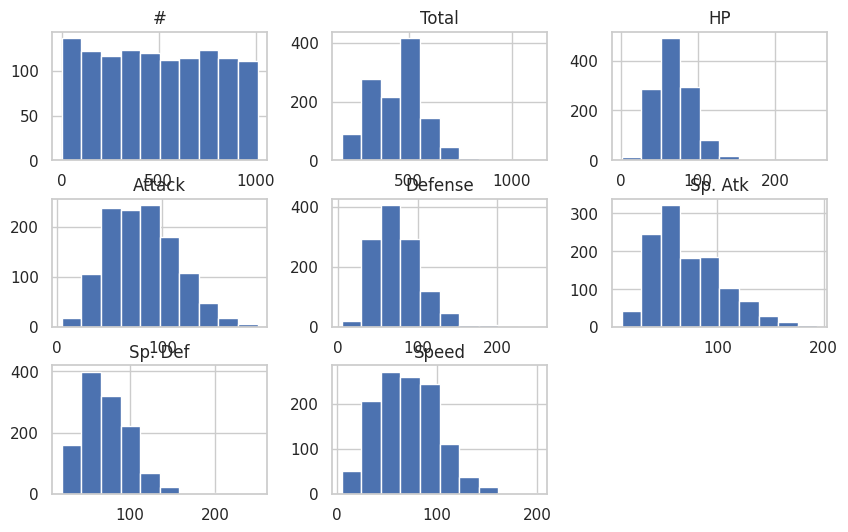

In [9]:
df.hist(bins=10, figsize=(10, 6))
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/GpBP9G5R/Firefly-87932.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Pokémon Type Correlation</p>

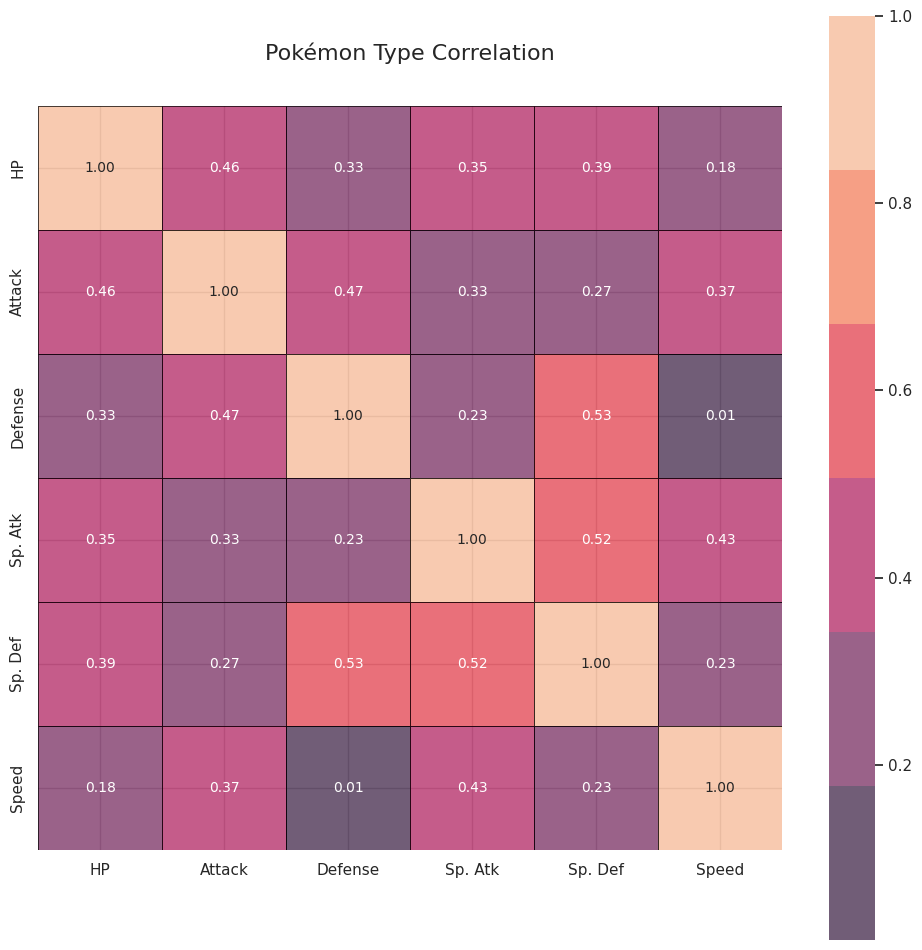

In [10]:

stat_columns = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

df_heatmap = df[stat_columns]

correlation_matrix = df_heatmap.corr()

plt.figure(figsize=(12, 12))
plt.title('Pokémon Type Correlation', y=1.05, size=16)
sns.heatmap(correlation_matrix, square=True, linewidths=0.5, linecolor='black', 
            cmap=sns.color_palette(palette='rocket'), annot=True, annot_kws={"size": 10}, alpha=0.7, fmt='.2f')
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/GpBP9G5R/Firefly-87932.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Pokémon  RandomForestRegressor</p>

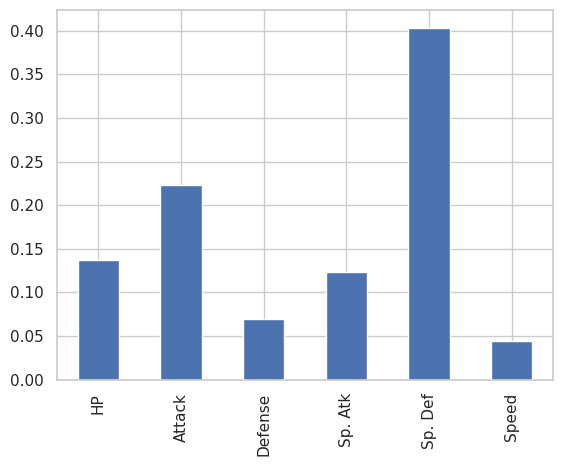

In [11]:
from sklearn.ensemble import RandomForestRegressor
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Total']
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='bar')
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/GpBP9G5R/Firefly-87932.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> Pokémon Type boxplot</p>

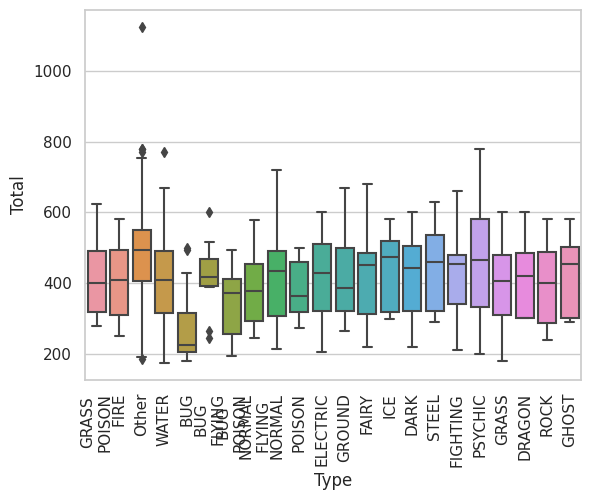

In [12]:
sns.boxplot(x='Type', y='Total', data=df)
plt.xticks(rotation=90)
plt.show()
